# 1D Diffusion In Class Practice

In [51]:
import numpy
from matplotlib import pyplot

%matplotlib inline

In [98]:
# Set parameters
nx = 41 #spatial grid points
L = 2.0 #length of domain
dx = L/ (nx - 1) #spatial grid size
nu = 0.3 #viscosity
sigma = 0.2 #CFL stability limit
dt = sigma * dx**2/nu #time step size for a stable solution
nt = 20 #number of time steps

# Get grid coordinates
x = numpy.linspace(0.0, L, num = nx)

# Set those initial conditions bruh
u0 = numpy.ones(nx)
mask = numpy.where((x >= 0.5) & (x <= 1.0)) #u square wave is 2.0 between x is 0.5 and 1.0
u0[mask] = 2.0

In [99]:
#Alternate solution scheme

u = u0.copy()
for n in range(nt):
    un = u.copy()
    for i in range(1, nx - 1):
        u[i] = un[i] + sigma * (un[i+1] - 2*un[i] + un[i-1])
    
u_naive = u

In [100]:
# Integrate in time using the second order discretization scheme

u = u0.copy()
for n in range(nt): 
    un = u.copy()
    u[1:-1] = un[1:-1] + sigma * (un[2:] - 2*un[1:-1] + un[:-2])
    
u_sophis = u

In [101]:
b1 = numpy.allclose(u_naive, u_sophis)
b2 = numpy.array_equal(u_naive, u_sophis)
print(b1)
print(b2)

True
True


# Animations!!

In [102]:
from matplotlib import animation
from IPython.display import HTML

In [103]:
def diffusion(u0, sigma = 0.5, nt = 20):
    """ Computes the numerical solution of the 1D diff. eq. over the input time steps"""
    u_hist = [u0.copy()] #list of arrays- history of u
    u = u0.copy()
    for n in range(nt): 
        un = u.copy()
        u[1:-1] = un[1:-1] + sigma * (un[2:] - 2*un[1:-1] + un[:-2])
        u_hist.append(u.copy())
    return u_hist
    

In [104]:
# Computes the history of the numerical solution over time
u_hist = diffusion(u0, sigma = sigma, nt = nt)

In [105]:
len(u_hist) #initial condition + 20 computed time steps

21

In [106]:
def plot_solution(nt, u_hist, x):
    pyplot.figure()
    pyplot.xlabel('x')
    pyplot.ylabel('y')
    pyplot.grid()
    pyplot.plot(x, u_hist[0], label = 'Initial')
    pyplot.plot(x, u_hist[nt], label = 'Current')
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.5, 2.5)
    pyplot.show()

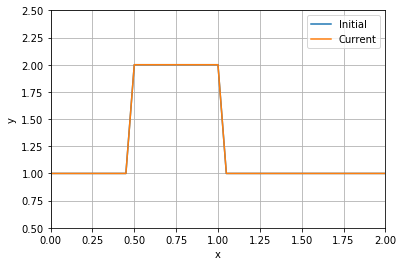

In [107]:
plot_solution(0, u_hist, x)

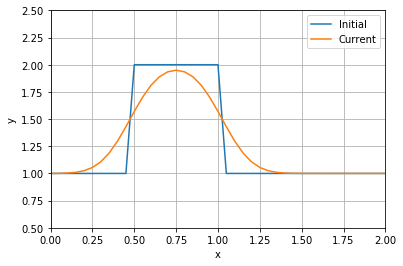

In [108]:
plot_solution(nt, u_hist, x)

In [109]:
import ipywidgets

In [110]:
nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                description='Time Step')
w = ipywidgets.interactive(plot_solution, nt=nt_slider, 
                           u_hist=ipywidgets.fixed(u_hist), 
                           x=ipywidgets.fixed(x))


In [111]:
w

interactive(children=(IntSlider(value=0, description='Time Step', max=20), Output()), _dom_classes=('widget-in…